In [134]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import json

In [160]:
options = np.sort(os.listdir("../new/temp"))
for option in options:
    if len(os.listdir("../new/temp/" + option)) != 0 and "VIT" in option:
        print(option)

20230915_VIT_DESY3
20230915_VIT_DESY3_4times
20230915_VIT_DESY3_double
20230915_VIT_DESY3_half
20230915_VIT_DESY3_half_twice
20230915_VIT_LSSTY1
20230915_VIT_LSSTY10
20230915_VIT_LSSTY10_half_twice
20230915_VIT_LSSTY10_twice
20230915_VIT_LSSTY1_double
20230915_VIT_LSSTY1_half
20230915_VIT_LSSTY1_twice


# Vision Transformer

In [157]:
fold = "../new/temp"
def get_history_file(model_name):
    chkpts = os.listdir(f"{fold}/{model_name}")
    chkpts = [int(chkpt.split("-")[1]) for chkpt in chkpts if "checkpoint" in chkpt]
    highest_chkpt = max(chkpts)
    print(highest_chkpt)
    return f"{fold}/{model_name}/checkpoint-{highest_chkpt}/trainer_state.json"

In [161]:
run_name = "20230915_VIT_LSSTY1_half"
history_file = get_history_file(run_name)

if "twice" in run_name:
    best_epoch_to_checkpoint = 1 / 27
elif "4times" in run_name:
    best_epoch_to_checkpoint = 1 / 53
else:
    best_epoch_to_checkpoint = 1 / 14

with open(history_file, "r") as f:
    jsondata = json.load(f)
    best_metric = jsondata["best_metric"]
    best_model_checkpoint = jsondata["best_model_checkpoint"]
    best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
    print(best_metric, best_model_checkpoint, best_epoch)
    
    history = jsondata["log_history"]
    vit_epochs = np.array([entry["epoch"] for entry in history])
    vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])

532
-1.2978495359420776 ./new/temp/20230915_VIT_LSSTY1_half/checkpoint-532 38


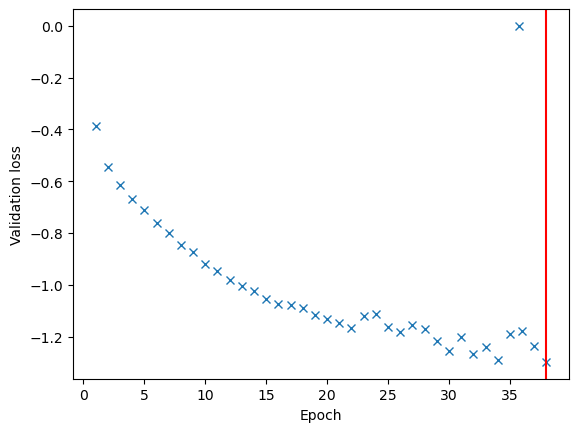

In [162]:
plt.figure()
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none")
plt.axvline(best_epoch, color="red")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

20230915_VIT_DESY3
-1.2298789024353027 ./new/temp/20230915_VIT_DESY3/checkpoint-602 43
20230915_VIT_DESY3_4times
-1.7076795101165771 ./new/temp/20230915_VIT_DESY3_4times/checkpoint-2438 46
20230915_VIT_DESY3_double
-1.1664197444915771 ./new/temp/20230915_VIT_DESY3_double/checkpoint-392 28
20230915_VIT_DESY3_half
-1.2741798162460327 ./new/temp/20230915_VIT_DESY3_half/checkpoint-784 56


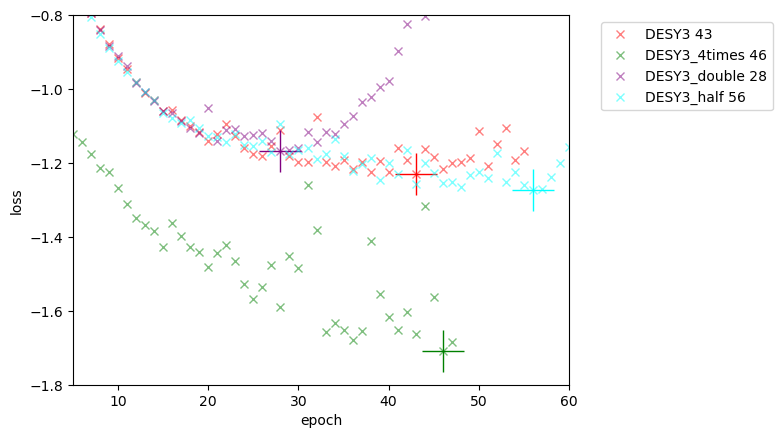

In [148]:
plt.figure()
colors = ["red", "blue", "green", "orange", "purple", \
            "cyan", "magenta", "yellow", "black", "brown"]
for run_name, color in zip(np.sort(os.listdir(fold)), colors):
    if "16times" in run_name:
        continue
    if "8times" in run_name:
        continue
    if "twice" in run_name:
        continue
    if "VIT" not in run_name:
        continue
    if "DESY3" not in run_name:
        continue
    print(run_name)
    history_file = get_history_file(run_name)

    if "twice" in run_name:
        best_epoch_to_checkpoint = 1 / 27
    elif "4times" in run_name:
        best_epoch_to_checkpoint = 1 / 53
    else:
        best_epoch_to_checkpoint = 1 / 14

    with open(history_file, "r") as f:
        jsondata = json.load(f)
        best_metric = jsondata["best_metric"]
        best_model_checkpoint = jsondata["best_model_checkpoint"]
        best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
        print(best_metric, best_model_checkpoint, best_epoch)
        
        history = jsondata["log_history"]
        vit_epochs = np.array([entry["epoch"] for entry in history])
        vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])
    plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", alpha=0.5,\
             label=run_name[run_name.index("VIT_")+4:] + " " + str(best_epoch), color=color)
    plt.plot(best_epoch, best_metric, marker="+", ls="none", color=color, markersize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(5, 60)
plt.ylim(-1.8, -0.8)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.close()

# ResNet

In [138]:
np.sort(os.listdir("../new/temp")), len(os.listdir("../new/temp"))

(array(['20230915_VIT_DESY3', '20230915_VIT_DESY3_16times',
        '20230915_VIT_DESY3_4times', '20230915_VIT_DESY3_8times',
        '20230915_VIT_DESY3_double', '20230915_VIT_DESY3_half',
        '20230915_VIT_DESY3_half_twice', '20230915_VIT_DESY3_twice',
        '20230915_VIT_LSSTY1', '20230915_VIT_LSSTY10',
        '20230915_VIT_LSSTY10_4times', '20230915_VIT_LSSTY10_double',
        '20230915_VIT_LSSTY10_half', '20230915_VIT_LSSTY10_half_twice',
        '20230915_VIT_LSSTY10_twice', '20230915_VIT_LSSTY1_4times',
        '20230915_VIT_LSSTY1_double', '20230915_VIT_LSSTY1_half',
        '20230915_VIT_LSSTY1_half_twice', '20230915_VIT_LSSTY1_twice',
        '20230915_resnet_DESY3', '20230915_resnet_DESY3_4times',
        '20230915_resnet_DESY3_double', '20230915_resnet_DESY3_half',
        '20230915_resnet_DESY3_half_twice', '20230915_resnet_DESY3_onebin',
        '20230915_resnet_LSSTY1', '20230915_resnet_LSSTY10',
        '20230915_resnet_LSSTY10_4times', '20230915_resnet_LSSTY10_

In [152]:
options = np.sort(os.listdir("../new/temp"))
for option in options:
    if os.path.exists("../new/temp/" + option + "/chkpts") and \
      len(os.listdir("../new/temp/" + option + "/chkpts")) != 0 \
      and "resnet" in option:
        print(option)

20230915_resnet_DESY3
20230915_resnet_DESY3_double
20230915_resnet_DESY3_half
20230915_resnet_DESY3_half_twice
20230915_resnet_LSSTY1
20230915_resnet_LSSTY10
20230915_resnet_LSSTY10_half
20230915_resnet_LSSTY10_half_twice
20230915_resnet_LSSTY1_half
20230915_resnet_LSSTY1_half_twice


In [153]:
def get_history_file(model_name):
    # return glob.glob(f'../temp/{model_name}/*logs*')
    return glob.glob(f'../new/temp/{model_name}/*logs*')

In [154]:
# history_files = get_history_file("20230813_cnn_DES")
history_files = get_history_file("20230915_resnet_LSSTY1")

rn_val_loss = []
rn_epochs = []
for history_file in history_files:
    with open(history_file, "r") as f:
        for line in f.readlines():
            if not "Val Loss" in line:
                continue
            rn_val_loss += [float(line.split()[-1])]
            rn_epochs += [int(line.split()[1])]

best_epoch = rn_epochs[np.argmin(rn_val_loss)]

len(rn_epochs), len(rn_val_loss), best_epoch

(19, 19, 14)

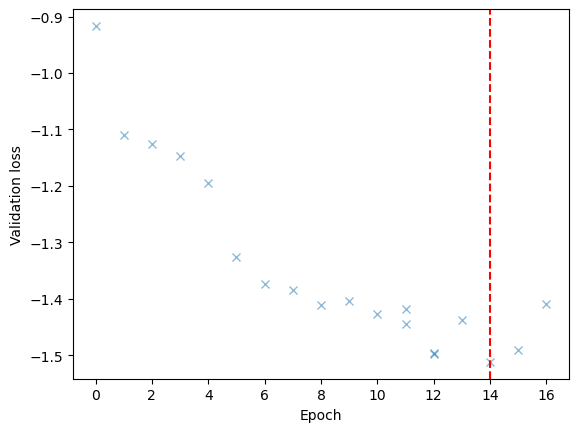

In [155]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", alpha=0.5)
plt.axvline(x=best_epoch, color="red", ls="--", label="Best epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

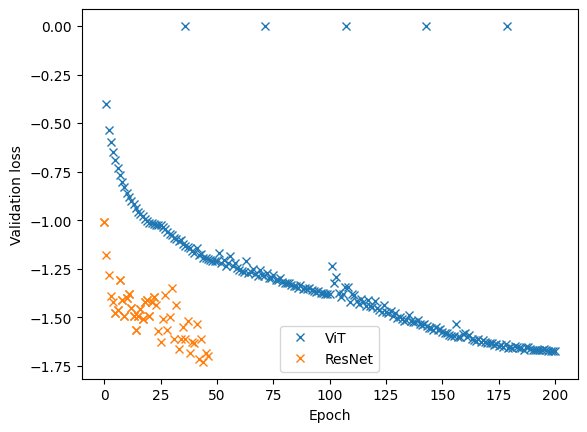

In [17]:
plt.figure
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", label="ViT")
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", label="ResNet")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()
plt.close()